# K Nearest Neighbors

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [129]:
# Generate random data
n_observations = 40
n_classes = 3

X = np.random.randint(0, 10, (n_observations, 2))
y = np.random.randint(0, n_classes, n_observations)

# Create a new observation
new_observation = np.array([3.5, 2.5])



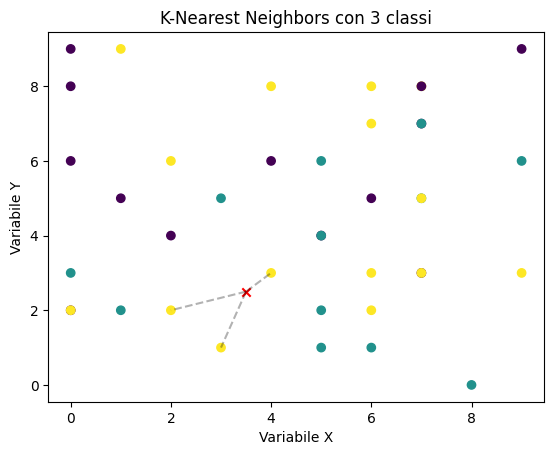

In [130]:

# Create a K-Nearest Neighbors classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Calculate the K-Nearest Neighbors
distances, indices = knn.kneighbors([new_observation])

# Get the labels of the K-Nearest Neighbors
neighbors_labels = y[indices]

# Plot dei dati con i vicini più prossimi evidenziati
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(new_observation[0], new_observation[1], c='red', marker='x')
for neighbor in X[indices][0]:
    plt.plot([new_observation[0], neighbor[0]], [new_observation[1], neighbor[1]], 'k--', alpha=0.3)
plt.xlabel('Variabile X')
plt.ylabel('Variabile Y')
plt.title('K-Nearest Neighbors con 3 classi')
plt.show()

# Other data

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


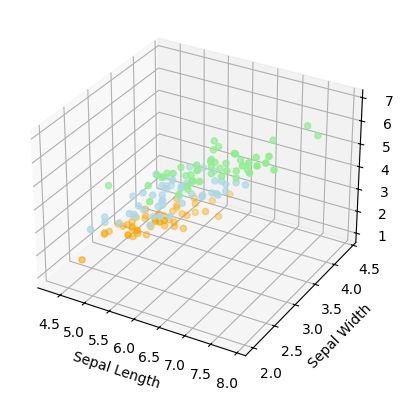

In [132]:
# Assuming 'labels' contains the category for each point
categories = iris.species.unique()  # Example labels
# 
color_list = []
for i in iris['species']:
    if i == categories[0]:
        color_list.append('orange')
    elif i == categories[1]:
        color_list.append('lightblue')
    else:
        color_list.append('lightgreen')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=color_list)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.show()


In [144]:
y = iris['species']
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9


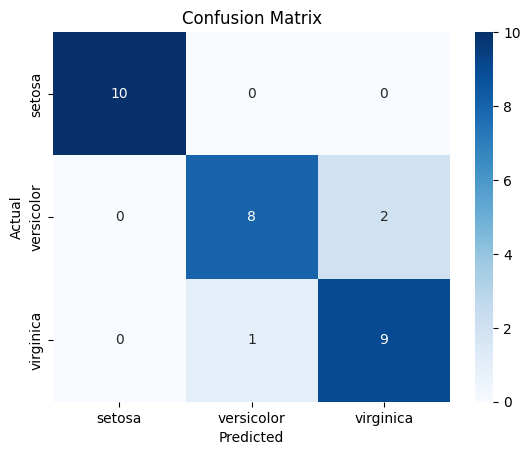

In [145]:
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns=categories, index=categories)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Preprocessing - Standardization

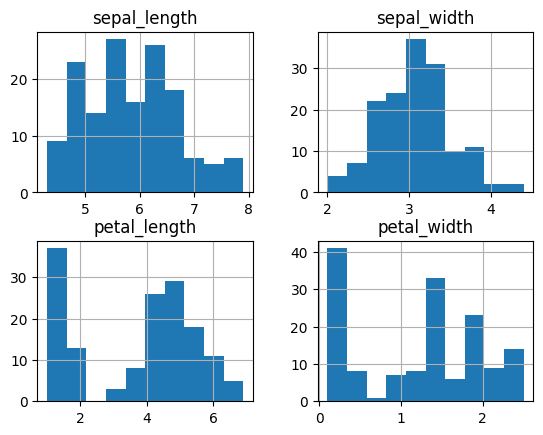

In [146]:
# plot histogram for each feature
X.hist()
plt.show()

In [147]:
# Standardize the features
X_std = (X - X.mean()) / X.std()


In [137]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=109)

In [148]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


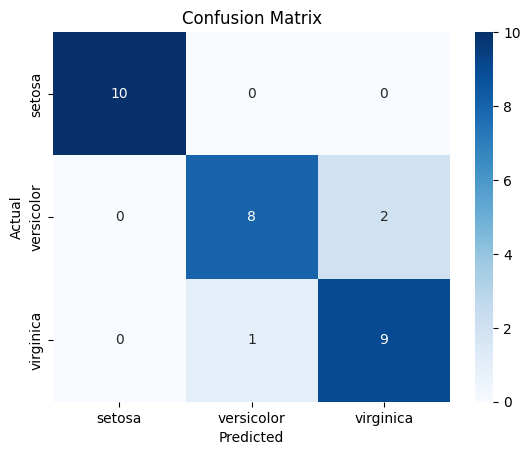

In [149]:
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns=categories, index=categories)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature preprocessing - Normalization

In [150]:
# Normalize the features
X_norm = (X - X.min()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=109)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


# Choosing K

In [151]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print("Best K:", knn_cv.best_params_['n_neighbors'])
print("Accuracy:", knn_cv.best_score_)

Best K: 2
Accuracy: 0.9833333333333334


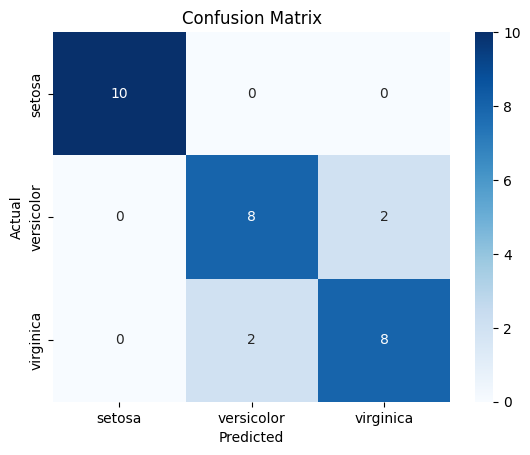

In [152]:
# Plot confusion matrix
y_pred = knn_cv.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns=categories, index=categories)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()